In [46]:
df_final

,Age,is_female,RestingBP,Cholesterol,FastingBS,MaxHR,has_exercise_angina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0,0.414885,0.834754,0,1.382928,0,-0.727592,0,1,0,0,1,0,0,1
1,-0.478484,1,1.527224,-1.210675,0,0.754157,0,0.282891,1,0,1,0,1,0,1,0
2,-1.751359,0,-0.141284,0.722161,0,-1.525138,0,-0.727592,0,1,0,0,0,1,0,1
3,-0.584556,1,0.303651,-0.572651,0,-1.132156,1,0.282891,1,0,0,0,1,0,1,0
4,0.051881,0,0.971054,-0.929194,0,-0.581981,0,-0.727592,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0,-1.253622,0.365619,0,-0.188999,0,0.282891,1,0,0,1,1,0,1,0
914,1.536902,0,0.637353,-0.966725,1,0.164684,0,2.303858,1,0,0,0,1,0,1,0
915,0.370100,0,-0.141284,-2.130180,0,-0.857069,1,0.282891,1,0,0,0,1,0,1,0
916,0.370100,1,-0.141284,-0.159813,0,1.461525,0,-0.727592,1,1,0,0,0,0,1,0


In [45]:
df_final = df.copy()

In [43]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

# Safe loop — skips missing columns
chi2_results = {}

for col in cat_features:
    if col in df.columns:
        contingency = pd.crosstab(df[col], df['HeartDisease'])
        chi2_stat, p_val, _, _ = chi2_contingency(contingency)
        decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
        chi2_results[col] = {
            'chi2_statistic': chi2_stat,
            'p_value': p_val,
            'Decision': decision
        }
    else:
        print(f"⚠️ Column not found: {col}")

chi2_df = pd.DataFrame(chi2_results).T.sort_values(by='p_value')
chi2_df


⚠️ Column not found: ST_Slope_UP


,chi2_statistic,p_value,Decision
ST_Slope_Flat,279.659914,0.0,Reject Null (Keep Feature)
has_exercise_angina,222.259383,0.0,Reject Null (Keep Feature)
Oldpeak,182.849456,0.0,Reject Null (Keep Feature)
ChestPainType_ATA,146.236323,0.0,Reject Null (Keep Feature)
MaxHR,241.320595,0.0,Reject Null (Keep Feature)
Age,125.365667,0.0,Reject Null (Keep Feature)
RestingBP,92.318868,0.01459,Reject Null (Keep Feature)


In [37]:
cat_features = [
    "ST_Slope_Flat", "ST_Slope_UP", 
    "has_exercise_angina", "ChestPainType_ATA",
    "MaxHR", "RestingBP", "Oldpeak", "Age"
]

In [36]:
from scipy.stats import pearsonr

selected_features = [
    'Age', 'is_female', 'RestingBP', 'Cholesterol', 'FastingBS',
    'MaxHR', 'has_exercise_angina', 'Oldpeak',
    'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
    'RestingECG_Normal', 'RestingECG_ST',
    'ST_Slope_Flat', 'ST_Slope_Up', 
]

correlations = {
    feature : pearsonr(df[feature], df['HeartDisease'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)


,Feature,Pearson Correlation
13,ST_Slope_Flat,0.554134
6,has_exercise_angina,0.494282
7,Oldpeak,0.392385
0,Age,0.282039
4,FastingBS,0.267291
2,RestingBP,0.117909
12,RestingECG_ST,0.102527
3,Cholesterol,0.092586
10,ChestPainType_TA,-0.054790
11,RestingECG_Normal,-0.091580


In [28]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,Age,is_female,RestingBP,Cholesterol,FastingBS,MaxHR,has_exercise_angina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0,0.414885,0.834754,0,1.382928,0,-0.727592,0,1,0,0,1,0,0,1
1,-0.478484,1,1.527224,-1.210675,0,0.754157,0,0.282891,1,0,1,0,1,0,1,0
2,-1.751359,0,-0.141284,0.722161,0,-1.525138,0,-0.727592,0,1,0,0,0,1,0,1
3,-0.584556,1,0.303651,-0.572651,0,-1.132156,1,0.282891,1,0,0,0,1,0,1,0
4,0.051881,0,0.971054,-0.929194,0,-0.581981,0,-0.727592,0,0,1,0,1,0,0,1


In [27]:
df.head()

,Age,is_female,RestingBP,Cholesterol,FastingBS,MaxHR,has_exercise_angina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0,0,1,0,0,1,0,0,1
1,49,1,160,180,0,156,0,1,1,0,1,0,1,0,1,0
2,37,0,130,283,0,98,0,0,0,1,0,0,0,1,0,1
3,48,1,138,214,0,108,1,1,1,0,0,0,1,0,1,0
4,54,0,150,195,0,122,0,0,0,0,1,0,1,0,0,1


In [26]:
df = df.astype(int)

In [25]:
df =  pd.get_dummies(df, drop_first=True)
df

,Age,is_female,RestingBP,Cholesterol,FastingBS,MaxHR,has_exercise_angina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140.0,289.0,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,1,160.0,180.0,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,0,130.0,283.0,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,1,138.0,214.0,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,0,150.0,195.0,0,122,0,0.0,0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110.0,264.0,0,132,0,1.2,1,False,False,True,True,False,True,False
914,68,0,144.0,193.0,1,141,0,3.4,1,False,False,False,True,False,True,False
915,57,0,130.0,131.0,0,115,1,1.2,1,False,False,False,True,False,True,False
916,57,1,130.0,236.0,0,174,0,0.0,1,True,False,False,False,False,True,False


In [24]:
df.head()

,Age,is_female,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,has_exercise_angina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140.0,289.0,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160.0,180.0,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130.0,283.0,0,ST,98,0,0.0,Up,0
3,48,1,ASY,138.0,214.0,0,Normal,108,1,1.5,Flat,1
4,54,0,NAP,150.0,195.0,0,Normal,122,0,0.0,Up,0


In [23]:
df.rename(columns={
    "Sex" : "is_female",
    "ExerciseAngina" : "has_exercise_angina",
}, inplace=True)

In [22]:
df["ExerciseAngina"] = df["ExerciseAngina"].map({"Y": 1, "N": 0})

In [21]:
df["Sex"] = df["Sex"].map({"M": 0, "F": 1})

Preprocessing

<Axes: >

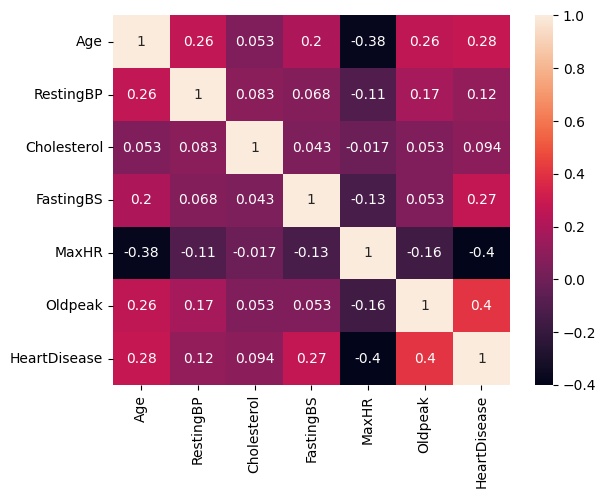

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='HeartDisease', ylabel='Age'>

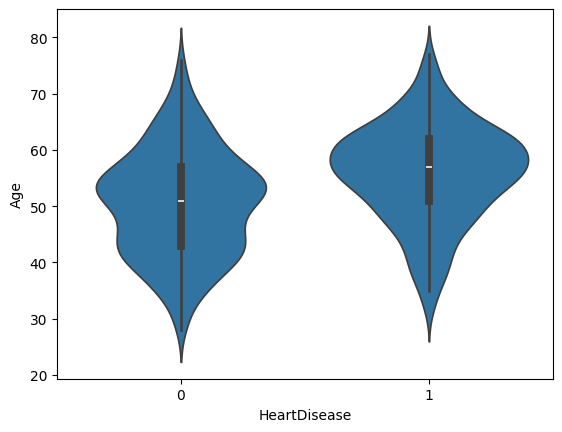

In [19]:
sns.violinplot(x='HeartDisease', y='Age', data=df)

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

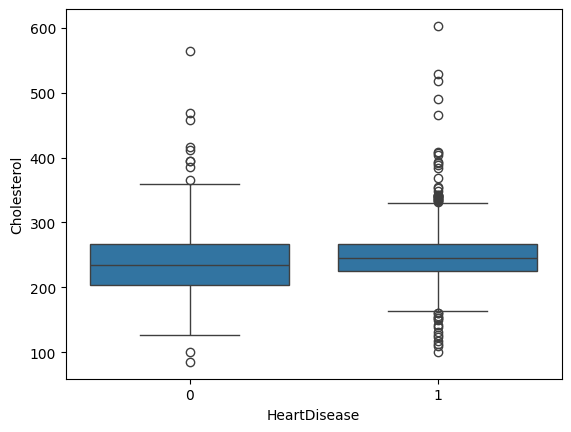

In [18]:
sns.boxplot(x = 'HeartDisease', y = 'Cholesterol',data = df)

<Axes: xlabel='FastingBS', ylabel='count'>

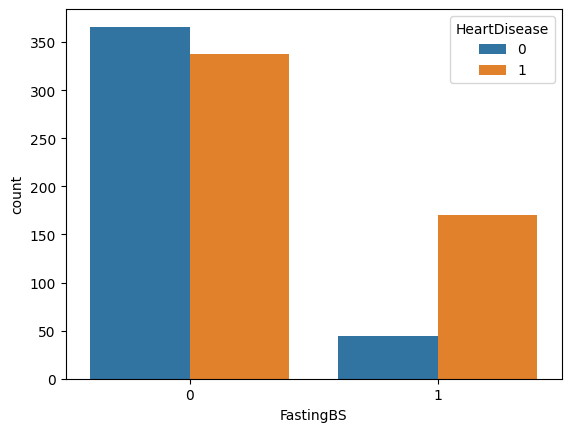

In [17]:
sns.countplot(x = df["FastingBS"], hue = df["HeartDisease"])

<Axes: xlabel='ChestPainType', ylabel='count'>

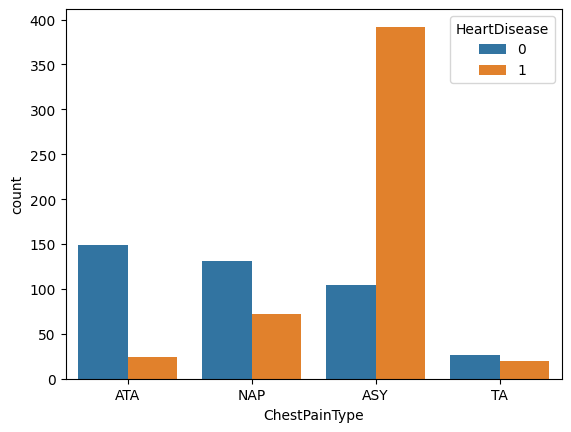

In [16]:
sns.countplot(x = df["ChestPainType"], hue = df["HeartDisease"])

<Axes: xlabel='Sex', ylabel='count'>

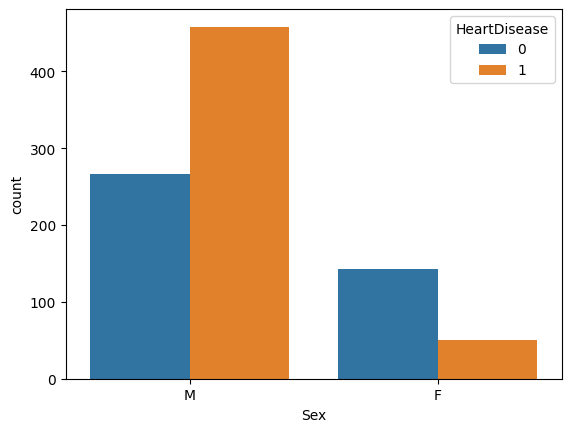

In [15]:
sns.countplot(x = df["Sex"], hue= df["HeartDisease"])

In [14]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


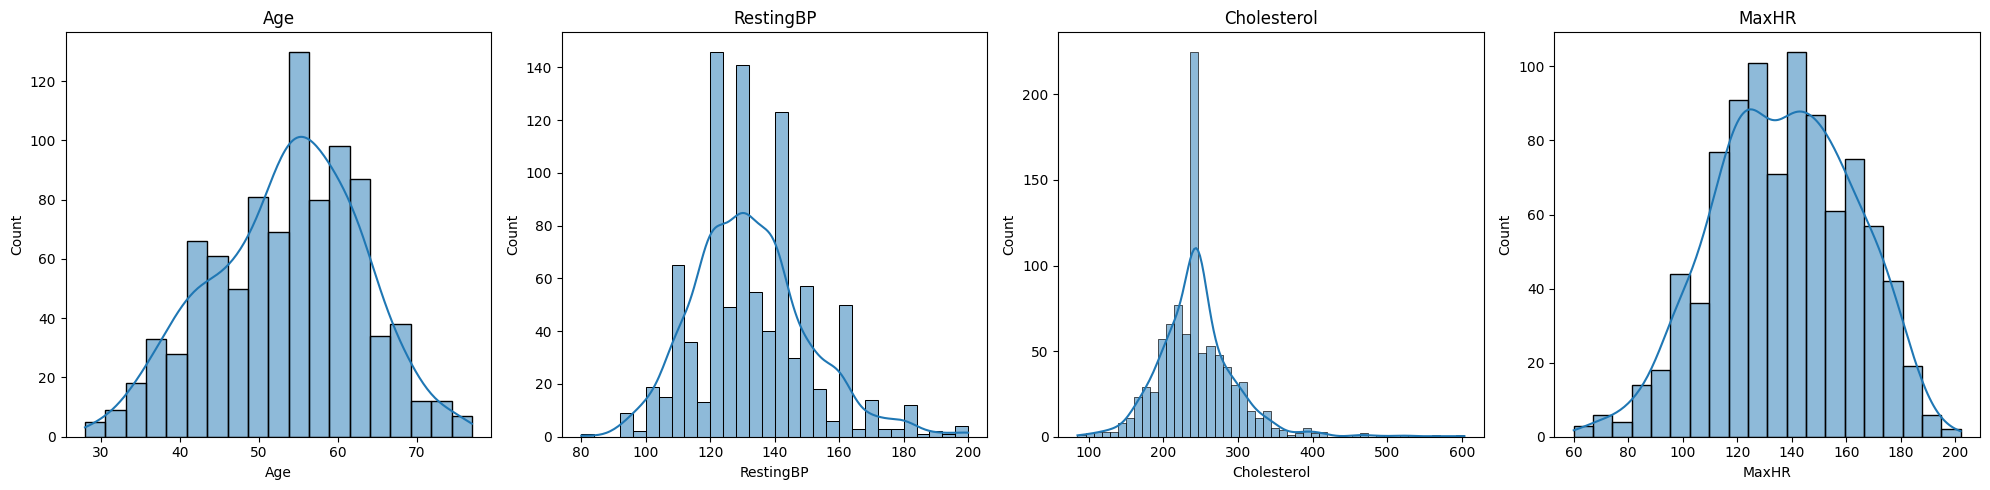

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [12]:
bp_mean = df.loc[df["RestingBP"] != 0, "RestingBP"].mean()
df["RestingBP"] = df["RestingBP"].replace(0, bp_mean)
df["RestingBP"] = df["RestingBP"].round(2)

In [11]:
ch_mean = df.loc[df["Cholesterol"] != 0, "Cholesterol"].mean()
df["Cholesterol"] = df["Cholesterol"].replace(0, ch_mean)
df["Cholesterol"] = df["Cholesterol"].round(2)

In [10]:
df["Cholesterol"].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

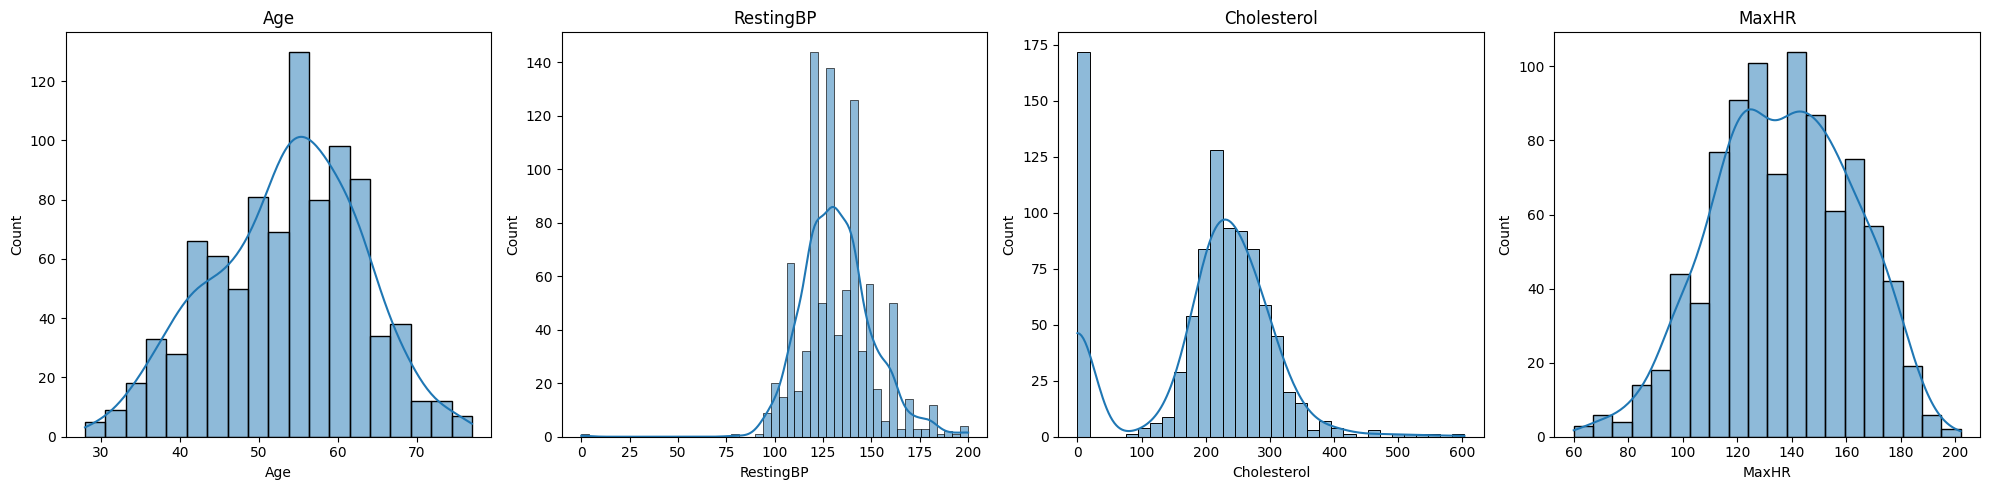

In [9]:
numeric_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR",]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

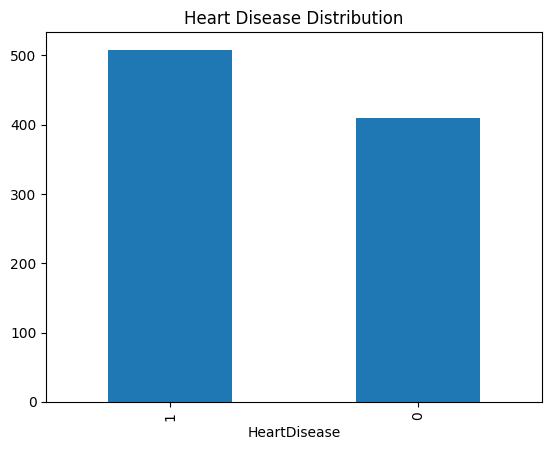

In [8]:
df["HeartDisease"].value_counts().plot(kind="bar")
plt.title("Heart Disease Distribution") 
plt.show()

In [7]:
df.shape

(918, 12)

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings